In [1]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
# load in json data as pandas dataframe
with open('data.json') as data_file:    
    json = json.load(data_file)

In [3]:
df = pd.DataFrame(json['items'])

In [4]:
df.dtypes

item_icon             object
item_icon_large       object
item_id                int64
item_type             object
item_typeIcon         object
item_name             object
item_description      object
item_current_trend    object
item_current_price    object
item_today_trend      object
item_today_price      object
item_members          object
item_day30_trend      object
item_day30_change     object
item_day90_trend      object
item_day90_change     object
item_day180_trend     object
item_day180_change    object
dtype: object

In [5]:
# convert columns to strings
df['item_current_price'] = df['item_current_price'].apply(str)
df['item_today_price'] = df['item_today_price'].apply(str)
df['item_day30_change'] = df['item_day30_change'].apply(str)
df['item_day90_change'] = df['item_day90_change'].apply(str)
df['item_day180_change'] = df['item_day180_change'].apply(str)

In [6]:
# replace k, m and b with appropriate values
df['item_current_price'] = df['item_current_price'].str.replace('k', '*1e3')
df['item_current_price'] = df['item_current_price'].str.replace('m', '*1e6')
df['item_current_price'] = df['item_current_price'].str.replace('b', '*1e9')
df['item_today_price'] = df['item_today_price'].str.replace('k', '*1e3')
df['item_today_price'] = df['item_today_price'].str.replace('m', '*1e6')
df['item_today_price'] = df['item_today_price'].str.replace('b', '*1e9')

In [7]:
# strip symbols from columns
df['item_current_price'] = df['item_current_price'].apply(lambda x: x.replace(',',''))
df['item_today_price'] = df['item_today_price'].apply(lambda x: x.replace(',',''))
df['item_day30_change'] = df['item_day30_change'].map(lambda x: x.strip(',').lstrip('+-').rstrip('%'))
df['item_day90_change'] = df['item_day90_change'].map(lambda x: x.strip(',').lstrip('+-').rstrip('%'))
df['item_day180_change'] = df['item_day30_change'].map(lambda x: x.strip(',').lstrip('+-').rstrip('%'))
df['item_today_price'] = df['item_today_price'].map(lambda x: x.strip(',').lstrip('+- '))

In [8]:
df.head()

,item_icon,item_icon_large,item_id,item_type,item_typeIcon,item_name,item_description,item_current_trend,item_current_price,item_today_trend,item_today_price,item_members,item_day30_trend,item_day30_change,item_day90_trend,item_day90_change,item_day180_trend,item_day180_change
0,https://secure.runescape.com/m=itemdb_oldschoo...,https://secure.runescape.com/m=itemdb_oldschoo...,2,Default,https://www.runescape.com/img/categories/Default,Cannonball,Ammo for the Dwarf Cannon.,neutral,184,negative,8,true,positive,2.0,negative,3.0,positive,2.0
1,http://services.runescape.com/m=itemdb_oldscho...,http://services.runescape.com/m=itemdb_oldscho...,6,Default,http://www.runescape.com/img/categories/Default,Cannon base,The cannon is built on this.,neutral,188.3*1e3,negative,695,true,positive,2.0,positive,0.0,positive,2.0
2,http://services.runescape.com/m=itemdb_oldscho...,http://services.runescape.com/m=itemdb_oldscho...,8,Default,http://www.runescape.com/img/categories/Default,Cannon stand,The mounting for the multicannon.,neutral,189.5*1e3,positive,1493,true,positive,2.0,negative,0.0,positive,2.0
3,http://services.runescape.com/m=itemdb_oldscho...,http://services.runescape.com/m=itemdb_oldscho...,10,Default,http://www.runescape.com/img/categories/Default,Cannon barrels,The barrels of the multicannon.,neutral,184.0*1e3,negative,3800,true,negative,0.0,negative,0.0,positive,0.0
4,http://services.runescape.com/m=itemdb_oldscho...,http://services.runescape.com/m=itemdb_oldscho...,12,Default,http://www.runescape.com/img/categories/Default,Cannon furnace,This powers the multicannon.,neutral,189.1*1e3,positive,375,true,negative,0.0,negative,1.0,negative,0.0


In [9]:
# evaluate values
df['item_current_price'] = df.item_current_price.apply(lambda x: eval(x))
df['item_today_price'] = df.item_today_price.apply(lambda x: eval(x))

In [10]:
# convert object columns to float for operations
df["item_day30_change"] = pd.to_numeric(df["item_day30_change"])
df["item_day90_change"] = pd.to_numeric(df["item_day90_change"])
df["item_day180_change"] = pd.to_numeric(df["item_day180_change"])
df["item_current_price"] = pd.to_numeric(df["item_current_price"])
df["item_today_price"] = pd.to_numeric(df["item_today_price"])

In [11]:
# change percentages to a 0-1 scale
df['item_day30_change'] = df['item_day30_change'] / 100
df['item_day90_change'] = df['item_day90_change'] / 100
df['item_day180_change'] = df['item_day180_change'] / 100
df.head()

,item_icon,item_icon_large,item_id,item_type,item_typeIcon,item_name,item_description,item_current_trend,item_current_price,item_today_trend,item_today_price,item_members,item_day30_trend,item_day30_change,item_day90_trend,item_day90_change,item_day180_trend,item_day180_change
0,https://secure.runescape.com/m=itemdb_oldschoo...,https://secure.runescape.com/m=itemdb_oldschoo...,2,Default,https://www.runescape.com/img/categories/Default,Cannonball,Ammo for the Dwarf Cannon.,neutral,184.0,negative,8.0,true,positive,0.02,negative,0.03,positive,0.02
1,http://services.runescape.com/m=itemdb_oldscho...,http://services.runescape.com/m=itemdb_oldscho...,6,Default,http://www.runescape.com/img/categories/Default,Cannon base,The cannon is built on this.,neutral,188300.0,negative,695.0,true,positive,0.02,positive,0.00,positive,0.02
2,http://services.runescape.com/m=itemdb_oldscho...,http://services.runescape.com/m=itemdb_oldscho...,8,Default,http://www.runescape.com/img/categories/Default,Cannon stand,The mounting for the multicannon.,neutral,189500.0,positive,1493.0,true,positive,0.02,negative,0.00,positive,0.02
3,http://services.runescape.com/m=itemdb_oldscho...,http://services.runescape.com/m=itemdb_oldscho...,10,Default,http://www.runescape.com/img/categories/Default,Cannon barrels,The barrels of the multicannon.,neutral,184000.0,negative,3800.0,true,negative,0.00,negative,0.00,positive,0.00
4,http://services.runescape.com/m=itemdb_oldscho...,http://services.runescape.com/m=itemdb_oldscho...,12,Default,http://www.runescape.com/img/categories/Default,Cannon furnace,This powers the multicannon.,neutral,189100.0,positive,375.0,true,negative,0.00,negative,0.01,negative,0.00


In [54]:
# create new columns and calculate change in price over 30, 90 and 180 days
df.loc[df['item_day30_trend'] == 'positive', 'item_day30_price'] =  df['item_current_price'] + (df['item_current_price'] * df['item_day30_change'])
df.loc[df['item_day30_trend'] == 'negative', 'item_day30_price'] = df['item_current_price'] - (df['item_current_price'] * df['item_day30_change'])
df.loc[df['item_day90_trend'] == 'positive', 'item_day90_price'] =  df['item_current_price'] + (df['item_current_price'] * df['item_day90_change'])
df.loc[df['item_day90_trend'] == 'negative', 'item_day90_price'] = df['item_current_price'] - (df['item_current_price'] * df['item_day90_change'])
df.loc[df['item_day180_trend'] == 'positive', 'item_day180_price'] =  df['item_current_price'] + (df['item_current_price'] * df['item_day180_change'])
df.loc[df['item_day180_trend'] == 'negative', 'item_day180_price'] = df['item_current_price'] - (df['item_current_price'] * df['item_day180_change'])

In [55]:
df.loc[10]

item_icon             http://services.runescape.com/m=itemdb_oldscho...
item_icon_large       http://services.runescape.com/m=itemdb_oldscho...
item_id                                                              41
item_type                                                       Default
item_typeIcon           http://www.runescape.com/img/categories/Default
item_name                                               Steel arrowtips
item_description                     I can make some arrows with these.
item_current_trend                                              neutral
item_current_price                                                   33
item_today_trend                                                neutral
item_today_price                                                      0
item_members                                                       true
item_day30_trend                                               negative
item_day30_change                                               

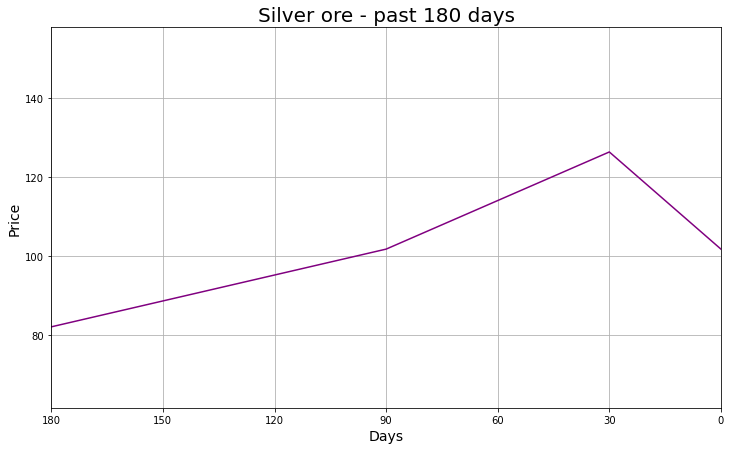

In [113]:
# plot item price
x = 176

time = [180, 90, 30, 0]
xticks = [180, 150, 120, 90, 60, 30, 0]
price = [df.loc[x, 'item_current_price'], df.loc[x, 'item_day30_price'], df.loc[x, 'item_day90_price'], df.loc[x, 'item_day180_price']]
max_price = max(price) * 1.25
min_price = min(price) * .75

fig = plt.figure(figsize=(12,7))
plt.plot(time, price, color = 'purple')
plt.xlim(180, 0) 
plt.ylim(min_price, max_price)
plt.xlabel('Days', size = 14)
plt.ylabel('Price', size = 14)
plt.xticks(xticks)
plt.title(df.loc[x, 'item_name'] + ' - past 180 days', size = 20)
plt.grid(True)

plt.show()